In [1]:
import torch
import torchaudio

In [2]:
!wget https://www.audiolabs-erlangen.de/resources/MIR/FMP/data/C3/FMP_C3_F03.mp3

--2023-03-13 15:36:32--  https://www.audiolabs-erlangen.de/resources/MIR/FMP/data/C3/FMP_C3_F03.mp3
Resolving www.audiolabs-erlangen.de (www.audiolabs-erlangen.de)... 131.188.16.208
Connecting to www.audiolabs-erlangen.de (www.audiolabs-erlangen.de)|131.188.16.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589377 (576K) [audio/mpeg]
Saving to: ‘FMP_C3_F03.mp3’

FMP_C3_F03.mp3      100%[===================>] 575.56K   401KB/s    in 1.4s    

2023-03-13 15:36:35 (401 KB/s) - ‘FMP_C3_F03.mp3’ saved [589377/589377]



In [6]:
y, sr = torchaudio.load("FMP_C3_F03.mp3")
y.shape, sr

(torch.Size([1, 2149632]), 22050)

In [7]:
# get duration
y.shape[1] / sr 

97.48897959183674

In [8]:
y[:100]

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  8.5831e-06,
         -2.0266e-06,  9.8348e-06]])

In [11]:
import IPython.display as ipd
ipd.display(ipd.Audio(y, rate=sr))

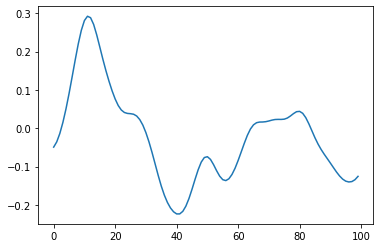

In [19]:
import matplotlib.pyplot as plt
plt.plot(y[0, 100000:100100])

In [22]:
# make spectrogram

spec_converter = torchaudio.transforms.Spectrogram(n_fft=400)
spectrogram = spec_converter(y)[0]

spectrogram.shape

torch.Size([201, 10749])

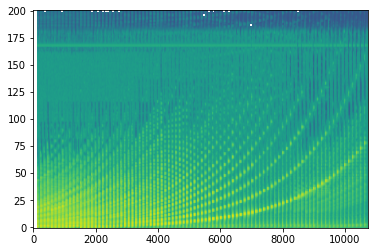

In [26]:
#2D image plot
plt.imshow(spectrogram.log(), aspect='auto', origin='lower')

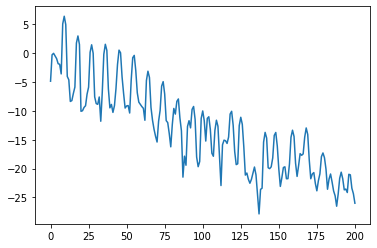

In [29]:
plt.plot(spectrogram[:, 6000].log())

In [33]:
spec_converter.hop_length, spec_converter.win_length

(200, 400)

In [39]:
sliced_samples = y_mono[1000000:1020000]
ipd.Audio(sliced_samples, rate=sr)

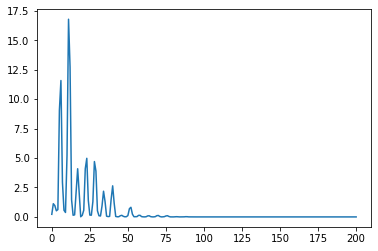

In [51]:
test_samples = sliced_samples[7000:7400]
# plt.plot(test_samples)
fft_result = torch.fft.fft( test_samples * torch.hann_window(400) )
plt.plot(fft_result.abs()[:201])

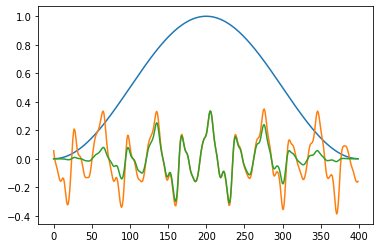

In [53]:
plt.plot(torch.hann_window(400))
plt.plot(test_samples)
plt.plot(test_samples * torch.hann_window(400))

In [66]:
# short-time fourier transform with for loop
out_spec = []
win_length = 400
hop_length = 200
y_mono = y[0]
window = torch.hann_window(win_length)

for i in range(win_length, len(y_mono), hop_length):
    start_i = i - win_length
    sliced_samples = y_mono[start_i : i ]
    print(start_i, i)
    windowed_samples = window * sliced_samples
    # do fft
    fft_result = torch.fft.fft(windowed_samples)
    # print(fft_result)
    out_spec.append(fft_result.abs()[:win_length//2+1])
    # pass
    # if i ==2000:
    #   break

0 400
200 600
400 800
600 1000
800 1200
1000 1400
1200 1600
1400 1800
1600 2000
1800 2200
2000 2400
2200 2600
2400 2800
2600 3000
2800 3200
3000 3400
3200 3600
3400 3800
3600 4000
3800 4200
4000 4400
4200 4600
4400 4800
4600 5000
4800 5200
5000 5400
5200 5600
5400 5800
5600 6000
5800 6200
6000 6400
6200 6600
6400 6800
6600 7000
6800 7200
7000 7400
7200 7600
7400 7800
7600 8000
7800 8200
8000 8400
8200 8600
8400 8800
8600 9000
8800 9200
9000 9400
9200 9600
9400 9800
9600 10000
9800 10200
10000 10400
10200 10600
10400 10800
10600 11000
10800 11200
11000 11400
11200 11600
11400 11800
11600 12000
11800 12200
12000 12400
12200 12600
12400 12800
12600 13000
12800 13200
13000 13400
13200 13600
13400 13800
13600 14000
13800 14200
14000 14400
14200 14600
14400 14800
14600 15000
14800 15200
15000 15400
15200 15600
15400 15800
15600 16000
15800 16200
16000 16400
16200 16600
16400 16800
16600 17000
16800 17200
17000 17400
17200 17600
17400 17800
17600 18000
17800 18200
18000 18400
18200 18600
1840

In [63]:
spec = torch.stack(out_spec, dim=1)
spec.shape

torch.Size([201, 10747])

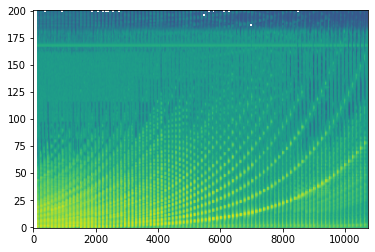

In [65]:
plt.imshow(spec.log(), aspect='auto', origin='lower')